In [ ]:
!pip install wget

# Decision Tree

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Download Datasets

In [3]:
!python -m wget https://raw.githubusercontent.com/xuhuihuang/uwmadisonchem361/refs/heads/main/delaney_dataset_200compounds.csv \
--output delaney_dataset_200compounds.csv

!python -m wget https://raw.githubusercontent.com/xuhuihuang/uwmadisonchem361/refs/heads/main/delaney_dataset_40compounds.csv \
--output delaney_dataset_40compounds.csv

!python -m wget https://raw.githubusercontent.com/xuhuihuang/uwmadisonchem361/refs/heads/main/delaney_dataset_44compounds_with_outliers.csv \
--output delaney_dataset_44compounds_with_outliers.csv


Saved under delaney_dataset_200compounds.csv

Saved under delaney_dataset_40compounds.csv

Saved under delaney_dataset_44compounds_with_outliers.csv


### Load the curated Delaney dataset, which contains 200 compounds:
- 100 Soluble Compounds: Defined as those with a "measured log solubility in mols per litre" ≥ -2, labeled as 1.

- 100 Non-Soluble Compounds: Defined as those with a "measured log solubility in mols per litre" < -2, labeled as -1.

In [4]:
df = pd.read_csv('delaney_dataset_200compounds.csv')
df.head(2)

,Molecular Weight,Polar Surface Area,measured log solubility in mols per litre,solubility labels,smiles
0,103.124,23.79,-1.00,1,N#Cc1ccccc1
1,116.204,20.23,-1.81,1,CCCCCCCO


In [5]:
data = df.iloc[:].values

In [6]:
# data with Molecular Weight and Polar Surface Are as features.
X = data[:,0:2]

# solubility labels
y = data[:,3].astype(int)

### Visualize the 200 compounds

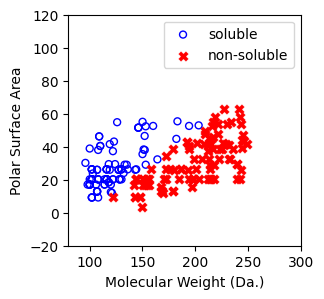

In [7]:
f, ax = plt.subplots(1,1,figsize=(3,3))

ax.scatter(X[np.where(y==1)[0],0],X[np.where(y==1)[0],1],s=25, marker='o', facecolors='none', edgecolor="blue", label='soluble')
ax.scatter(X[np.where(y==-1)[0],0],X[np.where(y==-1)[0],1],s=50, marker='X', color='red',linewidths=0.1, label='non-soluble')

ax.set_xlabel("Molecular Weight (Da.)")
ax.set_ylabel("Polar Surface Area")

ax.set_xlim(80,300)
ax.set_ylim(-20,120)

plt.legend()

## Perform decision tree classification on this dataset, let's do the first split



![Screenshot 2025-02-10 at 7.03.00 PM.png](attachment:cd4dd8d8-6bad-43bd-9bf1-3be5878ccd62.png)

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.inspection import DecisionBoundaryDisplay

In [9]:
clf = DecisionTreeClassifier(random_state=42,max_leaf_nodes=2,criterion='entropy')
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=2, random_state=42)

[Text(0.5, 0.75, 'Molecular Weight (Da.) <= 139.196\nentropy = 1.0\nsamples = 200\nvalue = [100, 100]\nclass = Non-soluble'),
 Text(0.25, 0.25, 'entropy = 0.094\nsamples = 83\nvalue = [1, 82]\nclass = Soluble'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'entropy = 0.619\nsamples = 117\nvalue = [99, 18]\nclass = Non-soluble'),
 Text(0.625, 0.5, '  False')]

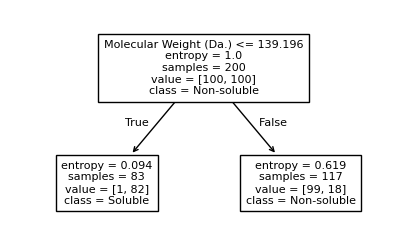

In [10]:
plt.figure(figsize=(5, 3))
plot_tree(clf, filled=False, feature_names=["Molecular Weight (Da.)", "Polar Surface Area"], class_names=["Non-soluble", "Soluble"], fontsize=8)

### Visualize the predicted regions from one-split decision tree model.
##### In this visualization, the blue region indicates that the model predicts the points within this area as soluble and vice versa

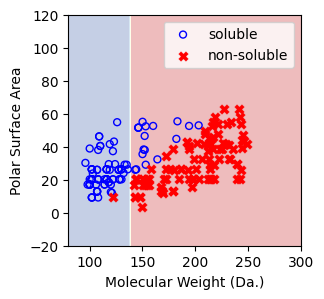

In [11]:
a = np.arange(80,301,0.1)
b = np.arange(-20,121,0.1)
aa,bb = np.meshgrid(a,b)
X_grid = np.concatenate([aa.ravel().reshape(-1,1),bb.ravel().reshape(-1,1)],axis=1)

f, ax = plt.subplots(1,1,figsize=(3,3))
#plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
DecisionBoundaryDisplay.from_estimator(
    clf,
    X_grid,
    cmap=plt.cm.RdYlBu,
    response_method="predict",
    ax=ax,
    alpha=0.3,
)
ax.scatter(X[np.where(y==1)[0],0],X[np.where(y==1)[0],1],s=25, marker='o', facecolors='none', edgecolor="blue", label='soluble')
ax.scatter(X[np.where(y==-1)[0],0],X[np.where(y==-1)[0],1],s=50, marker='X', color='red',linewidths=0.1, label='non-soluble')

ax.set_xlabel("Molecular Weight (Da.)")
ax.set_ylabel("Polar Surface Area")

ax.set_xlim(80,300)
ax.set_ylim(-20,120)

plt.legend()

## You can manually write the info gain formula to find the split, which is consistent with result from sklearn


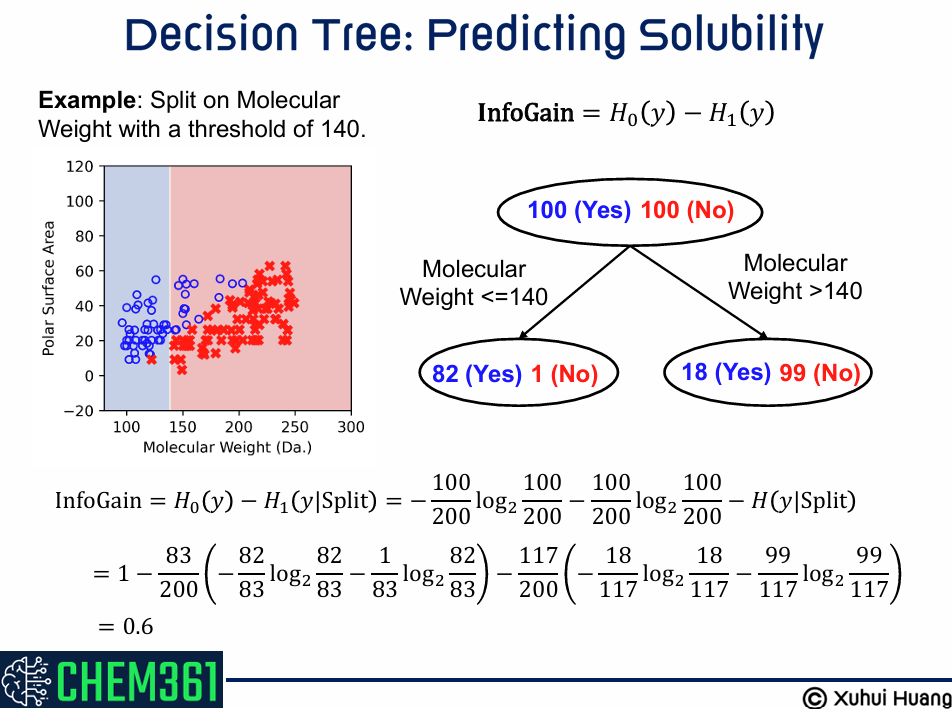

In [12]:
def entropy(p):
    return -p*np.log2(p) - (1-p)*np.log2(1-p)

def infogain(X,y,thres,axis=0):

    pos = len(np.where(y==1)[0])
    neg = len(np.where(y==-1)[0])

    if pos == 0 or neg == 0:
        Hy = 0
    else:
        Hy = entropy(pos/(pos+neg))

    idx0 = np.where(X[:,axis]<=thres)[0]
    idx1 = np.where(X[:,axis]>thres)[0]

    p0 = len(idx0)/(len(idx0)+len(idx1))
    p1 = 1 - p0

    y0 = y[idx0]
    pos = len(np.where(y0==1)[0])
    neg = len(np.where(y0==-1)[0])
    if pos == 0 or neg == 0:
        Hy0 = 0
    else:
        Hy0 = entropy(pos/(pos+neg))

    y1 = y[idx1]
    pos = len(np.where(y1==1)[0])
    neg = len(np.where(y1==-1)[0])
    if pos == 0 or neg == 0:
        Hy1 = 0
    else:
        Hy1 = entropy(pos/(pos+neg))

    HySplit = p0*Hy0 + p1*Hy1

    return Hy-HySplit

Text(0, 0.5, 'Info Gain')

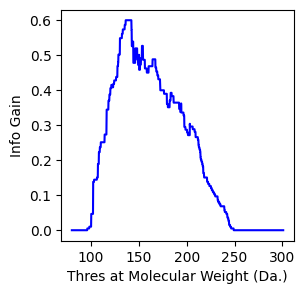

In [13]:
# scan the first feature of molecular weight
thres = np.arange(80,301,0.1)
ig = []
for i in thres:
    ig.append(infogain(X,y,i,axis=0))

f, ax = plt.subplots(1,1,figsize=(3,3))
ax.plot(thres,ig,c='blue')

ax.set_xlabel("Thres at Molecular Weight (Da.)")
ax.set_ylabel("Info Gain")

Text(0, 0.5, 'Info Gain')

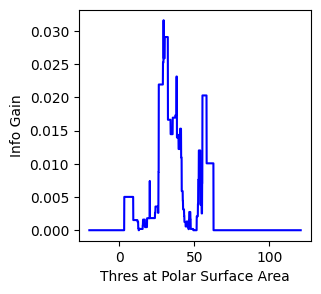

In [14]:
# scan the second feature of polar surface area
thres = np.arange(-20,121,0.1)
ig = []
for i in thres:
    ig.append(infogain(X,y,i,axis=1))

f, ax = plt.subplots(1,1,figsize=(3,3))
ax.plot(thres,ig,c='blue')

ax.set_xlabel("Thres at Polar Surface Area")
ax.set_ylabel("Info Gain")

### Split until all data points are correctly classified

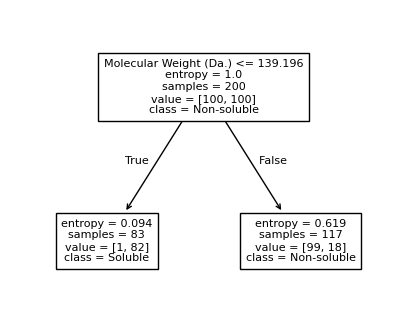

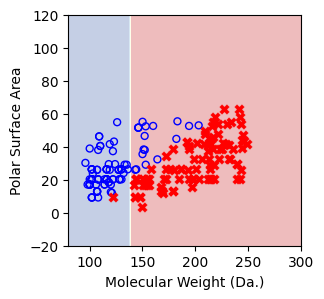

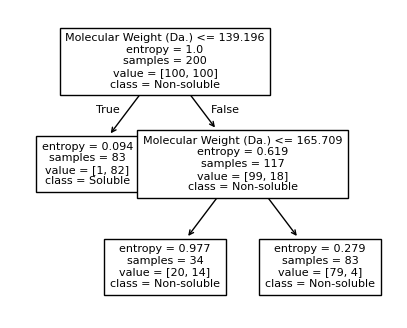

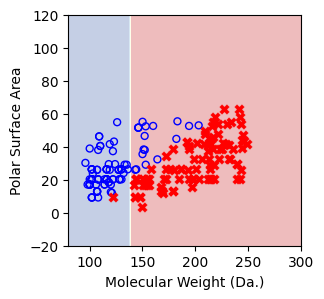

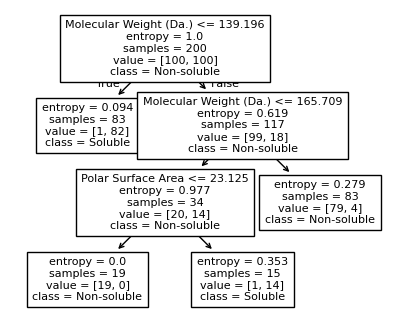

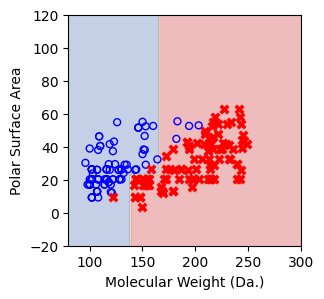

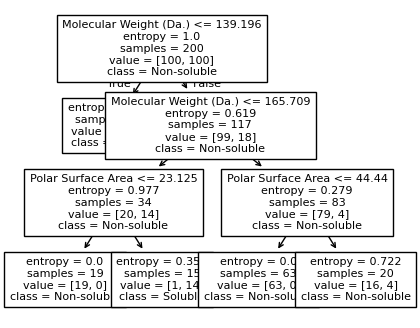

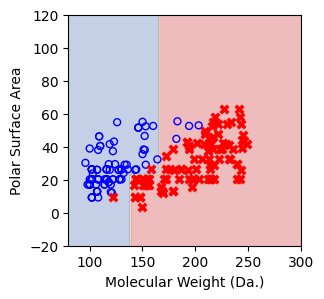

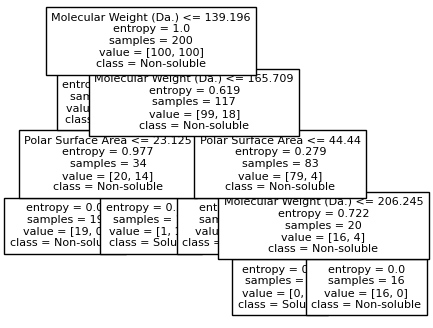

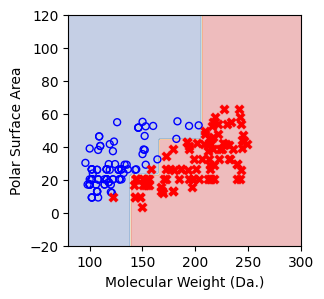

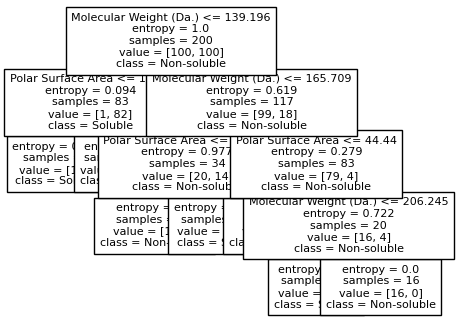

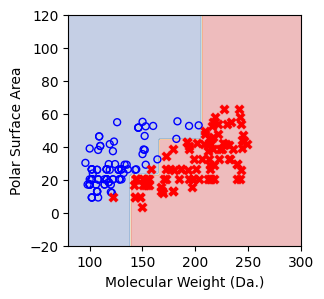

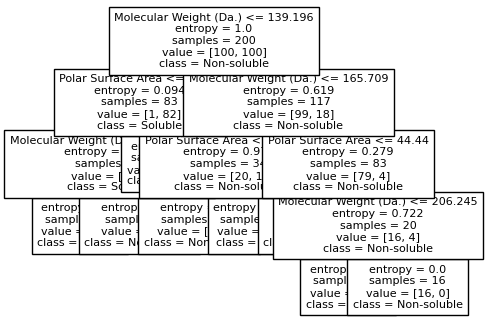

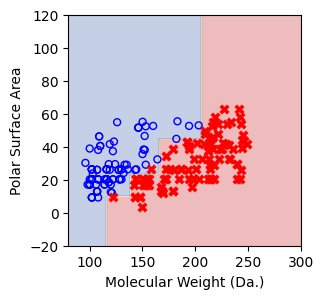

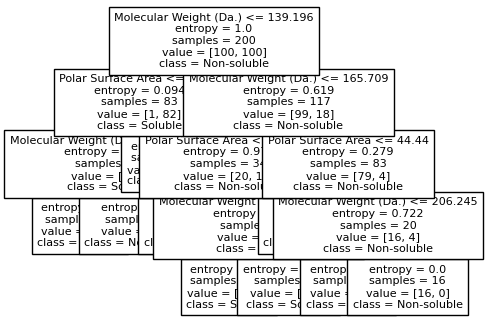

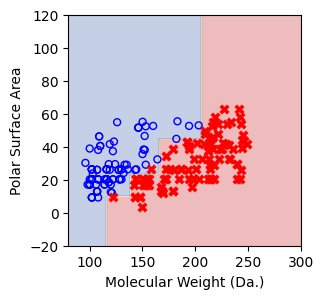

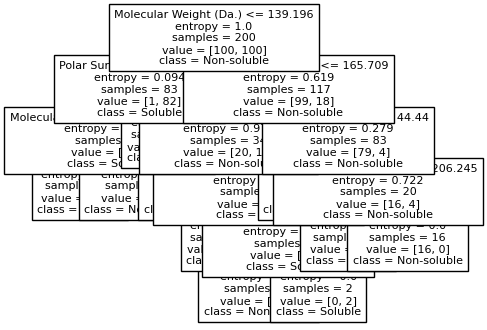

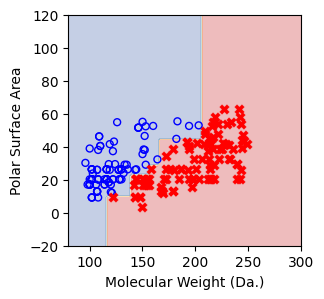

In [15]:
for num_nodes in range(2,20):

    clf = DecisionTreeClassifier(random_state=42,max_leaf_nodes=num_nodes,criterion='entropy')
    clf.fit(X, y)
    # when score == 1, indicating that all data points are correctly classified
    score = clf.score(X, y)

    plt.figure(figsize=(5, 4))
    plot_tree(clf, filled=False, feature_names=["Molecular Weight (Da.)", "Polar Surface Area"], class_names=["Non-soluble", "Soluble"], fontsize=8)


    a = np.arange(80,301,0.1)
    b = np.arange(-20,121,0.1)
    aa,bb = np.meshgrid(a,b)
    X_grid = np.concatenate([aa.ravel().reshape(-1,1),bb.ravel().reshape(-1,1)],axis=1)

    f, ax = plt.subplots(1,1,figsize=(3,3))
    #plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X_grid,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        alpha=0.3,
    )
    ax.scatter(X[np.where(y==1)[0],0],X[np.where(y==1)[0],1],s=25, marker='o', facecolors='none', edgecolor="blue", label='soluble')
    ax.scatter(X[np.where(y==-1)[0],0],X[np.where(y==-1)[0],1],s=50, marker='X', color='red',linewidths=0.1, label='non-soluble')

    ax.set_xlabel("Molecular Weight (Da.)")
    ax.set_ylabel("Polar Surface Area")

    ax.set_xlim(80,300)
    ax.set_ylim(-20,120)

    if score == 1.:
        break

### We then show decision tree is not robust to noisy data, lets use 40 compounds dataset again

In [16]:
df = pd.read_csv('delaney_dataset_40compounds.csv')
df.head(2)

data = df.iloc[:].values

# data with Molecular Weight and Polar Surface Are as features.
X = data[:,0:2]

# solubility labels
y = data[:,3].astype(int)

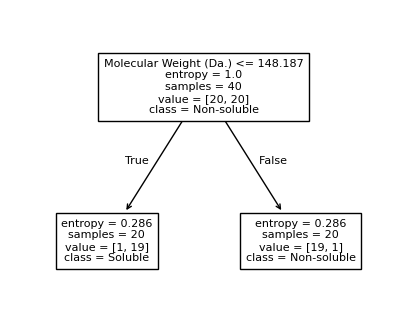

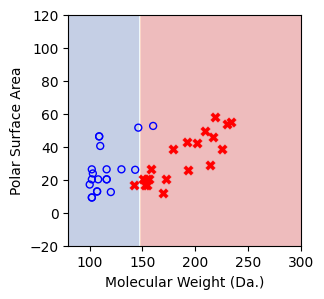

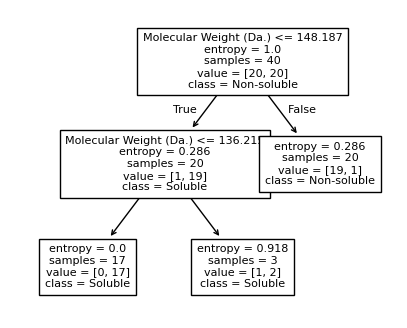

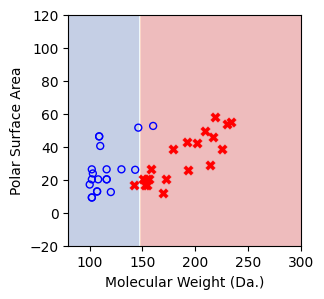

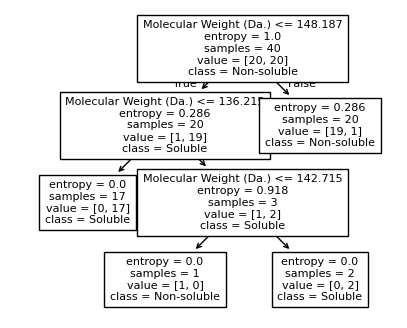

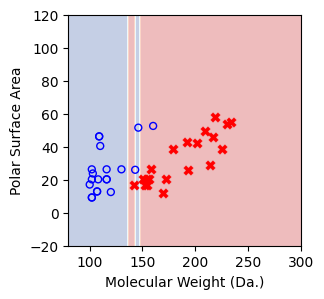

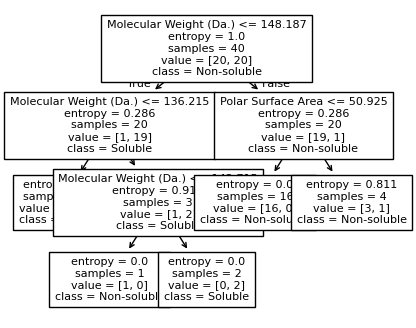

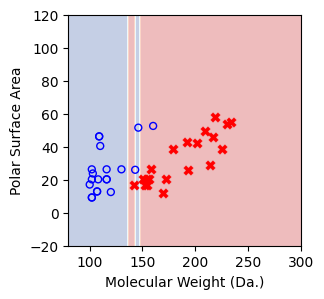

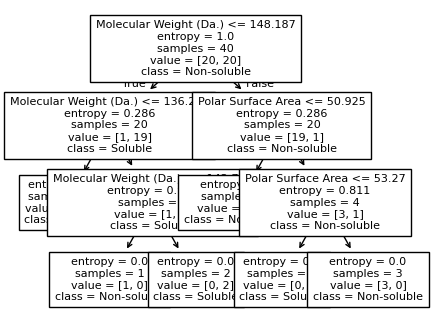

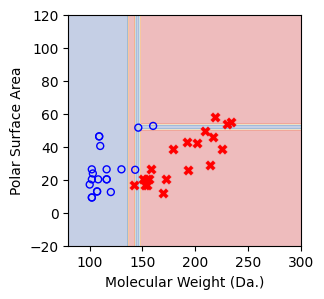

In [17]:
for num_nodes in range(2,20):

    clf = DecisionTreeClassifier(random_state=42,max_leaf_nodes=num_nodes,criterion='entropy')
    clf.fit(X, y)
    # when score == 1, indicating that all data points are correctly classified
    score = clf.score(X, y)

    plt.figure(figsize=(5, 4))
    plot_tree(clf, filled=False, feature_names=["Molecular Weight (Da.)", "Polar Surface Area"], class_names=["Non-soluble", "Soluble"], fontsize=8)


    a = np.arange(80,301,0.1)
    b = np.arange(-20,121,0.1)
    aa,bb = np.meshgrid(a,b)
    X_grid = np.concatenate([aa.ravel().reshape(-1,1),bb.ravel().reshape(-1,1)],axis=1)

    f, ax = plt.subplots(1,1,figsize=(3,3))
    #plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X_grid,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        alpha=0.3,
    )
    ax.scatter(X[np.where(y==1)[0],0],X[np.where(y==1)[0],1],s=25, marker='o', facecolors='none', edgecolor="blue", label='soluble')
    ax.scatter(X[np.where(y==-1)[0],0],X[np.where(y==-1)[0],1],s=50, marker='X', color='red',linewidths=0.1, label='non-soluble')

    ax.set_xlabel("Molecular Weight (Da.)")
    ax.set_ylabel("Polar Surface Area")

    ax.set_xlim(80,300)
    ax.set_ylim(-20,120)

    if score == 1.:
        break